In [1]:
#!pip install opencv-python

In [2]:
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.


In [3]:
def read_all_img_in_folder(path):
    img_names = listdir(path)
    
    imgs_lst = []
    imgs_lbl_lst = []
    
    for index, filename in enumerate(img_names):
        label = filename[0]
        
        img_path = path + filename
        
        img_raw = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        img = cv2.bitwise_not(img_raw)
        
        imgs_lst.append(img)
        imgs_lbl_lst.append(label)
    
    return imgs_lst, imgs_lbl_lst

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("pred {} {:2.0f}% actual {}".format(
        predicted_label,
        100*np.max(predictions_array),
        true_label),
        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

def only_unpredicted(predictions, true_labels):
    result = []
    
    for i in range(len(predictions)):
        max_val = np.argmax(predictions[i])
        if max_val != true_labels[i]:
            result.append(i)
    return result

In [4]:
img_dir = "MNIST_data/train/6000/"

img_train_list, img_train_lbl_list = read_all_img_in_folder(img_dir)

img_train_list = np.array(img_train_list, dtype='float')
img_train_lbl_list = np.array(img_train_lbl_list, dtype='float')

In [5]:
img_test_dir = "MNIST_data/test/1000/"

img_test_list, img_test_lbl_list = read_all_img_in_folder(img_test_dir)

img_test_list = np.array(img_test_list, dtype='float')
img_test_lbl_list = np.array(img_test_lbl_list, dtype='float')

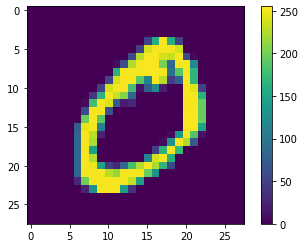

In [6]:
plt.figure()
plt.imshow(img_train_list[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
img_train_list = img_train_list / 255.0

img_test_list = img_test_list / 255.0

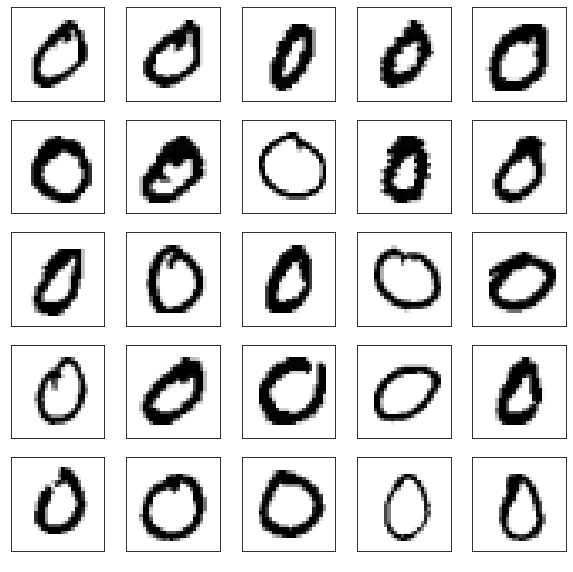

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_train_list[i], cmap=plt.cm.binary)
    plt.xlabel(img_train_lbl_list[i], color="white")
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)

In [10]:
model.fit(img_train_list, img_train_lbl_list, epochs=10, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
6000/6000 [==============================] - 1s 125us/step - loss: 0.6598 - acc: 0.8195
Epoch 2/10
6000/6000 [==============================] - 0s 67us/step - loss: 0.2794 - acc: 0.9257
Epoch 3/10
6000/6000 [==============================] - 1s 89us/step - loss: 0.2033 - acc: 0.9452
Epoch 4/10
6000/6000 [==============================] - 0s 70us/step - loss: 0.1595 - acc: 0.9558
Epoch 5/10
6000/6000 [==============================] - 0s 76us/step - loss: 0.1224 - acc: 0.9673
Epoch 6/10
6000/6000 [==============================] - 1s 89us/step - loss: 0.0954 - acc: 0.9785
Epoch 7/10
6000/6000 [==============================] - 0s 59us/step - loss: 0.0773 - acc: 0.9808
Epoch 8/10
6000/6000 [==============================] - 0s 62us/step - loss: 0.0616 - acc: 0.9857
Epoch 9/10
6000/6000 [==============================] - 0s 60us/step - loss: 0.0478 - acc: 0.9913
Epoch 10/10
6000/6000 

In [11]:
test_loss, test_acc = model.evaluate(img_test_list, img_test_lbl_list, verbose=2)

print('\nТочність на провірочних даних: ', test_acc)


Точність на провірочних даних:  0.931


In [12]:
predictions = model.predict(img_test_list)
predictions[0]

array([9.9985886e-01, 3.9018427e-10, 3.4498792e-06, 7.8401331e-07,
       3.0284242e-10, 3.0602343e-05, 6.0513412e-05, 1.3826944e-05,
       2.4565026e-08, 3.1954904e-05], dtype=float32)

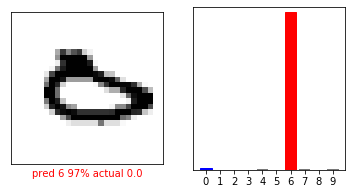

In [21]:
i = 63

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, img_test_lbl_list, img_test_list)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, img_test_lbl_list)
plt.show()

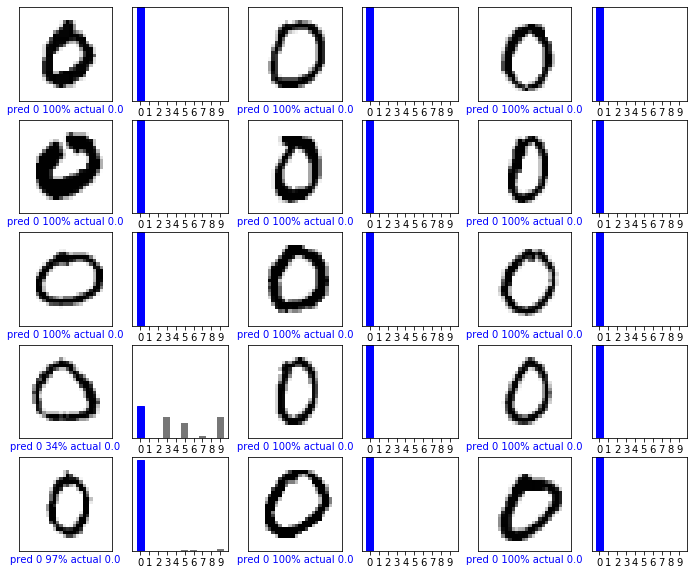

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, img_test_lbl_list, img_test_list)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, img_test_lbl_list)
plt.show()

In [24]:
#np.argmax(predictions[0])
unpredicted_indexes = only_unpredicted(predictions, img_test_lbl_list)


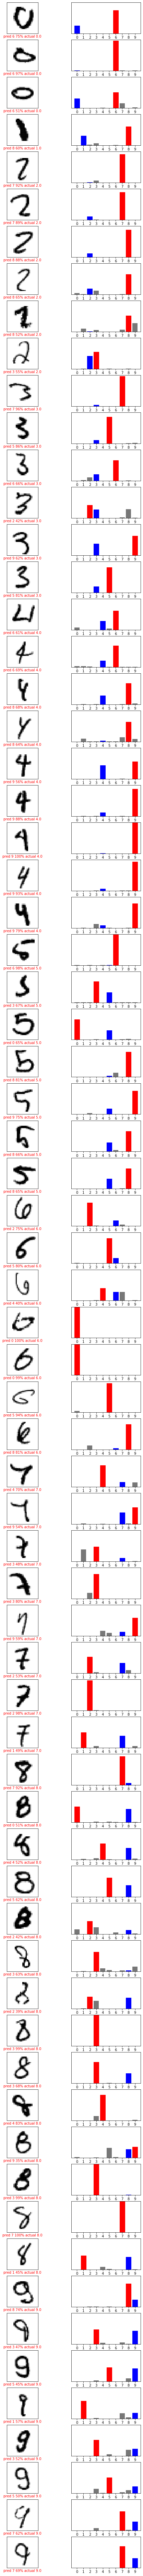

In [25]:
counter = 1

num_rows = len(unpredicted_indexes)
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in unpredicted_indexes:
    plt.subplot(num_rows, num_cols, counter)
    plot_image(i, predictions, img_test_lbl_list, img_test_list)
    counter = counter + 1
    
    plt.subplot(num_rows, num_cols, counter)
    plot_value_array(i, predictions, img_test_lbl_list)
    counter = counter + 1
    
plt.show()